# 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plot_image, plot_image_misclass
from capsnet import CapsNet
from capsnet_mod import CapsNetMod

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
  except RuntimeError as e:
    print(e)

# 1. Dataset

## 1.1. MNIST

In [4]:
data_name_1 = 'MNIST'
dataset_1 = Dataset(data_name_1)

In [5]:
# n_img = 6
# plot_image(dataset_1.x_test[:n_img], dataset_1.y_test[:n_img], dataset_1.class_names, n_img)
# print(dataset_1.x_test[0].shape, dataset_1.y_test[0].shape)

## 1.2. SMALLNORB

In [6]:
data_name_2 = 'SMALLNORB'
dataset_2 = Dataset(data_name_2)

In [7]:
# n_img = 6
# plot_image(dataset_2.x_test[:n_img], dataset_2.y_test[:n_img], dataset_2.class_names, n_img)
# print(dataset_2.x_test[0].shape, dataset_2.y_test[0].shape)

## 1.3. CIFAR10

In [8]:
data_name_3 = 'CIFAR10'
dataset_3 = Dataset(data_name_3)

In [9]:
# n_img = 6
# plot_image(dataset_3.x_test[:n_img], dataset_3.y_test[:n_img], dataset_3.class_names, n_img)
# print(dataset_3.x_test[0].shape, dataset_3.y_test[0].shape)

# 2. Test MNIST

## 2.1. CapsNet

In [10]:
model_mnist = CapsNet(data_name_1, mode='test', r=3)
model_mnist.load_weight(93)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 20, 256)       20992     
_________________________________________________________________
primary_caps (PrimaryCaps)   (None, 6, 6, 32, 8)       5308928   
_________________________________________________________________
digit_caps (DigitCaps)       (None, 10, 16)            1474720   
_________________________________________________________________
length (Length)              (None, 10)                0         
Total params: 6,804,640
Trainable params: 6,804,640
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 Out

In [11]:
model_mnist.evaluate(dataset_1.x_test, dataset_1.y_test)
y_pred = model_mnist.predict(dataset_1.x_test)[0]

Test Accuracy: 99.4500%
Test Error: 0.5500%


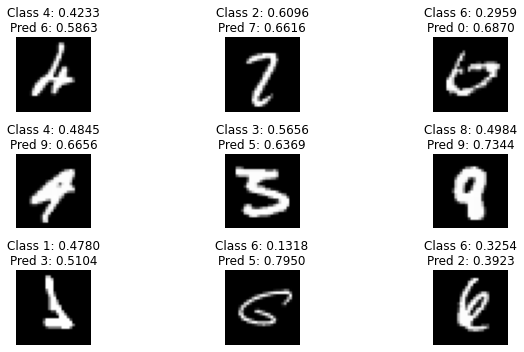

In [12]:
n_img = 9
plot_image_misclass(dataset_1.x_test, dataset_1.y_test, y_pred, dataset_1.class_names, n_img)

## 2.2. CapsNetMod

In [13]:
model_mod_mnist = CapsNetMod(data_name_1, mode='test')
model_mod_mnist.load_weight(26)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 22, 22, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256 

In [14]:
model_mod_mnist.evaluate(dataset_1.x_test, dataset_1.y_test)
y_pred = model_mod_mnist.predict(dataset_1.x_test)[0]

Test Accuracy: 99.5100%
Test Error: 0.4900%


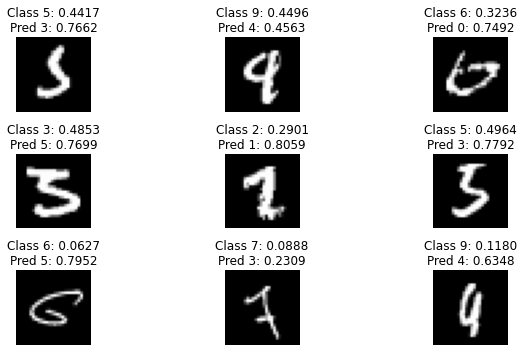

In [15]:
n_img = 9
plot_image_misclass(dataset_1.x_test, dataset_1.y_test, y_pred, dataset_1.class_names, n_img)

# 3. Test SMALLNORB

## 3.1. CapsNet

In [16]:
model_smallnorb = CapsNet(data_name_2, mode='test', r=3)
model_smallnorb.load_weight(95)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 2)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 256)       41728     
_________________________________________________________________
primary_caps_2 (PrimaryCaps) (None, 8, 8, 32, 8)       5308928   
_________________________________________________________________
digit_caps_2 (DigitCaps)     (None, 5, 16)             1310800   
_________________________________________________________________
length_2 (Length)            (None, 5)                 0         
Total params: 6,661,456
Trainable params: 6,661,456
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 Out

In [17]:
model_smallnorb.evaluate(dataset_2.x_test, dataset_2.y_test)
y_pred = model_smallnorb.predict(dataset_2.x_test)[0]

Test Accuracy: 97.5391%
Test Error: 2.4609%


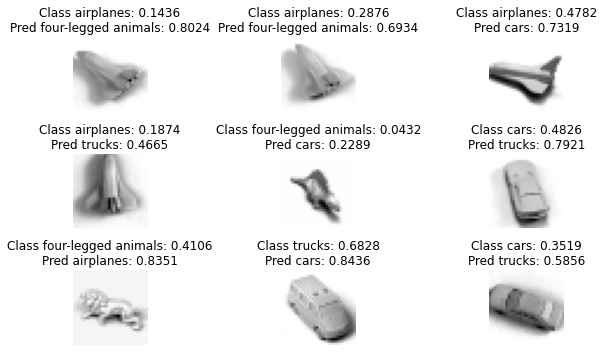

In [18]:
n_img = 9
plot_image_misclass(dataset_2.x_test, dataset_2.y_test, y_pred, dataset_2.class_names, n_img)

## 3.2. CapsNetMod

In [19]:
model_mod_smallnorb = CapsNetMod(data_name_2, mode='test')
model_mod_smallnorb.load_weight(75)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 32, 32, 2)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        1632      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 26, 26, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 64)        256 

In [20]:
model_mod_smallnorb.evaluate(dataset_2.x_test, dataset_2.y_test)
y_pred = model_mod_smallnorb.predict(dataset_2.x_test)[0]

Test Accuracy: 97.3951%
Test Error: 2.6049%


In [21]:
n_img = 9
plot_image_misclass(dataset_2.x_test, dataset_2.y_test, y_pred, dataset_2.class_names, n_img)

# 4. Test CIFAR10

## 4.1. CapsNet

In [22]:
model_cifar10 = CapsNet(data_name_3, mode='test', r=3)
model_cifar10.load_weight(13)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 256)       62464     
_________________________________________________________________
primary_caps_4 (PrimaryCaps) (None, 8, 8, 64, 8)       10617856  
_________________________________________________________________
digit_caps_4 (DigitCaps)     (None, 10, 16)            5243040   
_________________________________________________________________
length_4 (Length)            (None, 10)                0         
Total params: 15,923,360
Trainable params: 15,923,360
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 O

In [23]:
model_cifar10.evaluate(dataset_3.x_test, dataset_3.y_test)
y_pred = model_cifar10.predict(dataset_3.x_test)[0]

Test Accuracy: 69.4500%
Test Error: 30.5500%


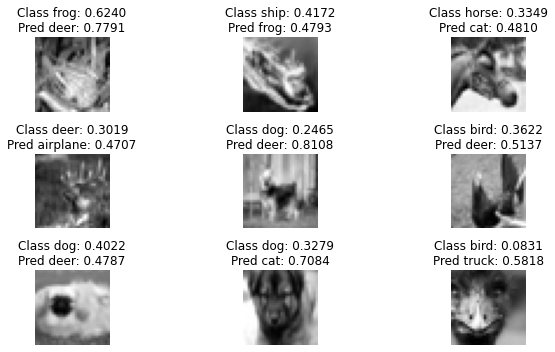

In [24]:
n_img = 9
plot_image_misclass(dataset_3.x_test, dataset_3.y_test, y_pred, dataset_3.class_names, n_img)

## 4.2. CapsNetMod

In [25]:
model_mod_cifar10 = CapsNetMod(data_name_3, mode='test')
model_mod_cifar10.load_weight(64)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 64)        256 

In [26]:
model_mod_cifar10.evaluate(dataset_3.x_test, dataset_3.y_test)
y_pred = model_mod_cifar10.predict(dataset_3.x_test)[0]

Test Accuracy: 80.0100%
Test Error: 19.9900%


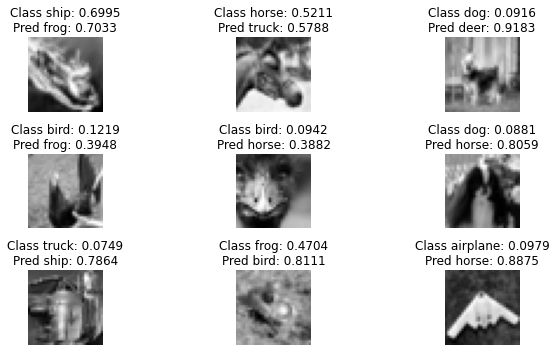

In [27]:
n_img = 9
plot_image_misclass(dataset_3.x_test, dataset_3.y_test, y_pred, dataset_3.class_names, n_img)